In [4]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [5]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [6]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [40]:
df = pd.read_csv("aerofit.csv")

In [9]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [10]:
df.shape

(180, 9)

* Product: Product Purchased KP281, KP481, or KP781 
* Age:  In years
* Gender: Male/Female
* Education: in years
* MaritalStatus: single or partnered
* Usage: average number of times the customer plans to use the treadmill each week
* Income: annual income (in $)
* Fitness: self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape. 
* Miles: average number of miles the customer expects to walk/run each week


In [11]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [12]:
df.isnull().sum()/len(df)*100

Product          0.0
Age              0.0
Gender           0.0
Education        0.0
MaritalStatus    0.0
Usage            0.0
Fitness          0.0
Income           0.0
Miles            0.0
dtype: float64

In [ ]:
-- 2% ---- drop column
-- >2% --- impute
-- 60% --- drop column 

In [13]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [14]:
# q1 = np.percentile(array, 0.25)
# q3 = np.percentile(array, 0.75)

# iqr = q3 - q1

# upper_limit = q3 + 1.5*iqr
# lower_limit = q1 - 1.5*iqr

## gender, income -- > Product

<AxesSubplot:xlabel='Gender', ylabel='Income'>

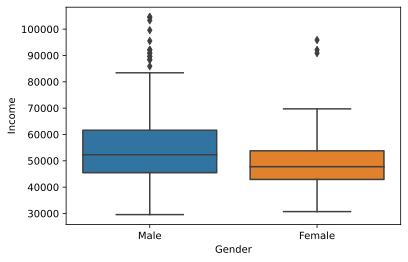

In [15]:
sns.boxplot(x = "Gender", y = "Income", data = df)

<AxesSubplot:xlabel='Gender', ylabel='Income'>

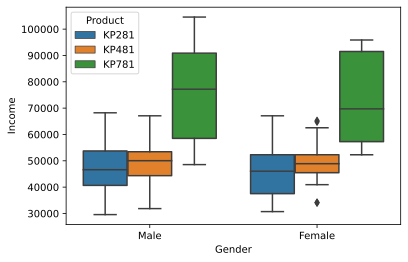

In [16]:
sns.boxplot(x = "Gender", y = "Income", data = df, hue = "Product")

In [18]:
## Marginal Probablility
df.Product.value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [19]:
df.Product.value_counts(normalize= True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [20]:
df.MaritalStatus.value_counts(normalize= True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

In [22]:
pd.crosstab(index = df["MaritalStatus"], columns = df["Product"] , margins=True)

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
All,80,60,40,180


In [24]:
pd.crosstab(index = df["MaritalStatus"], columns = df["Product"] , margins = True, normalize= "index")

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877
All,0.444444,0.333333,0.222222


In [26]:
## who's probalility is more of buying the high end product ? -- 23% singles

## if the product is bought by married people, what are the chances of buying the base model ? -- 44%

## if the product bought is KP481, who's buying it more ??

In [27]:
pd.crosstab(index = df["MaritalStatus"], columns = df["Product"] , margins = True, normalize= "columns")

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,0.6,0.6,0.575,0.594444
Single,0.4,0.4,0.425,0.405556


<AxesSubplot:>

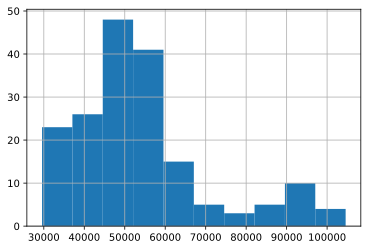

In [28]:
df.Income.hist()

In [29]:
df["Income"].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [42]:
bins = [-1.0 , 60000.0, 90000.0, 200000.0]
labels = ["lower", "middle", "upper"]


df["Income_category"] = pd.cut(df["Income"], bins = bins, labels = labels)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_category
0,KP281,18,Male,14,Single,3,4,29562,112,lower
1,KP281,19,Male,15,Single,2,3,31836,75,lower
2,KP281,19,Female,14,Partnered,4,3,30699,66,lower
3,KP281,19,Male,12,Single,3,3,32973,85,lower
4,KP281,20,Male,13,Partnered,4,2,35247,47,lower


In [43]:
pd.crosstab(index = df["Income_category"], columns = df["Product"] , margins = True)

Product,KP281,KP481,KP781,All
Income_category,,,,
lower,74,53,11,138
middle,6,7,17,30
upper,0,0,12,12
All,80,60,40,180


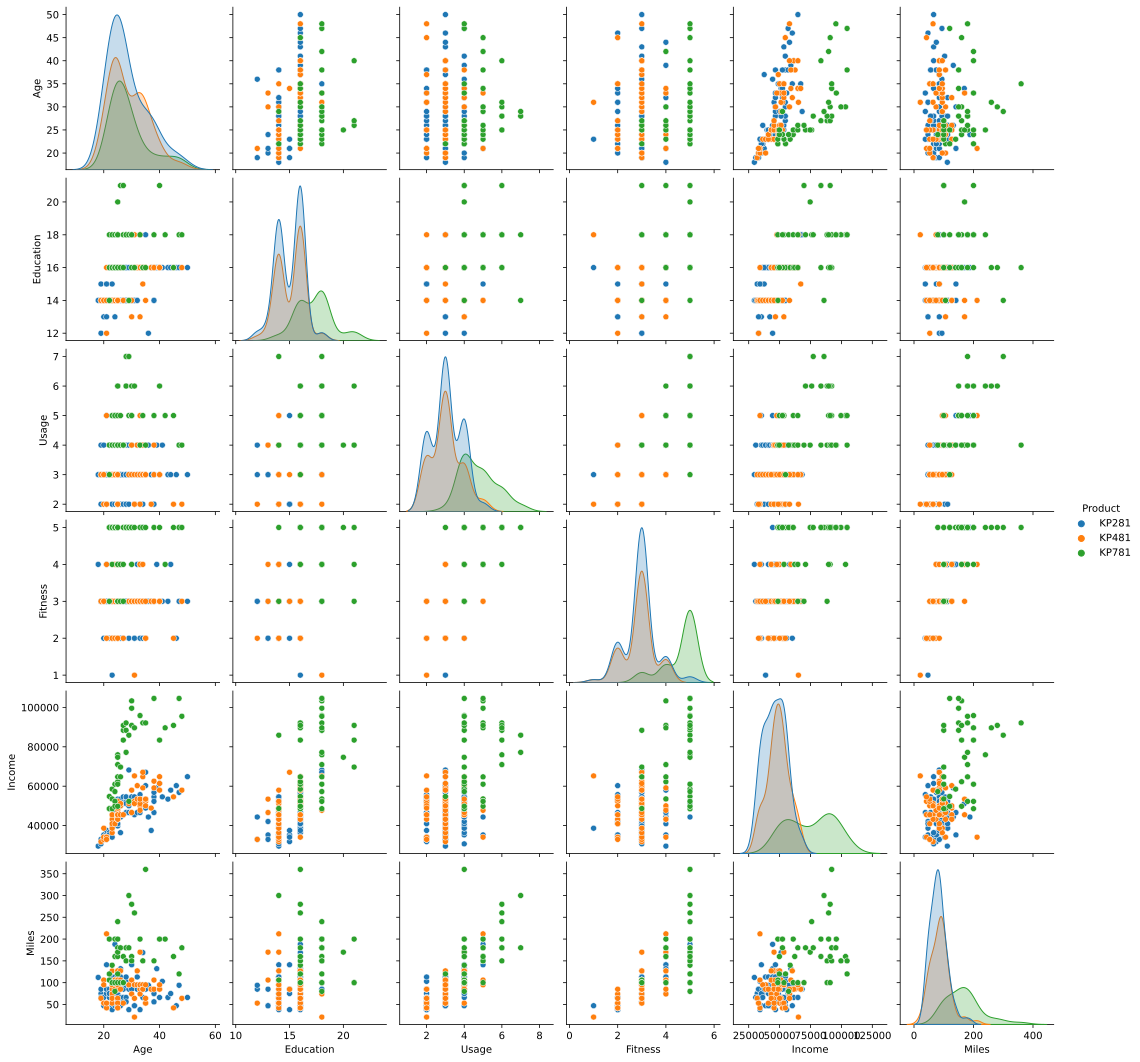

In [44]:
# Can you explain this graph for recommendations?
sns.pairplot(df, hue = 'Product')

## Customer Profiling

In [ ]:
## Example profile : Married and Women and >10 years of education and fitness = 5 

In [47]:
c1 = df.MaritalStatus == "Partnered"

c2 = df.Gender == "Female"

c3 = df.Education > 10

c4 = df.Fitness == 5

In [49]:
df[c1 & c2 & c3 & c4]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_category
23,KP281,24,Female,16,Partnered,5,5,44343,188,lower
152,KP781,25,Female,18,Partnered,5,5,61006,200,middle
162,KP781,28,Female,18,Partnered,6,5,92131,180,upper
167,KP781,30,Female,16,Partnered,6,5,90886,280,upper
171,KP781,33,Female,18,Partnered,4,5,95866,200,upper


In [50]:
df[c1 & c2 & c3 & c4]["Product"].value_counts(normalize = True)

KP781    0.8
KP281    0.2
Name: Product, dtype: float64

In [53]:
c1 = df.MaritalStatus == "Partnered"

c2 = df.Gender == "Female"

df[c1 & c2]["Product"].value_counts(normalize = True)

KP281    0.586957
KP481    0.326087
KP781    0.086957
Name: Product, dtype: float64

## make all coulumns numerical

In [57]:
# A broader look at correlation between the columns of dataframe

# Creating a copy of the dataframe -
df_copy = df.drop(["Income_category"], axis = 1).copy()

df_copy['Gender'].replace(['Male', 'Female'], [1, 0], inplace=True)

df_copy['MaritalStatus'].replace(['Single', 'Partnered'], [0, 1], inplace=True)

df_copy['Product'].replace(['KP281', 'KP481', 'KP781'], [0, 1, 2], inplace=True)

df_copy.corr()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,1.000000,0.032225,0.230653,0.495018,-0.017602,0.537447,0.594883,0.624168,0.571596
Age,0.032225,1.000000,0.027544,0.280496,0.192152,0.015064,0.061105,0.513414,0.036618
Gender,0.230653,0.027544,1.000000,0.094089,-0.018836,0.214424,0.254609,0.202053,0.217869
Education,0.495018,0.280496,0.094089,1.000000,0.068569,0.395155,0.410581,0.625827,0.307284
MaritalStatus,-0.017602,0.192152,-0.018836,0.068569,1.000000,-0.007786,-0.050751,0.150293,0.025639
Usage,0.537447,0.015064,0.214424,0.395155,-0.007786,1.000000,0.668606,0.519537,0.759130
Fitness,0.594883,0.061105,0.254609,0.410581,-0.050751,0.668606,1.000000,0.535005,0.785702
Income,0.624168,0.513414,0.202053,0.625827,0.150293,0.519537,0.535005,1.000000,0.543473
Miles,0.571596,0.036618,0.217869,0.307284,0.025639,0.759130,0.785702,0.543473,1.000000


## heatmaps

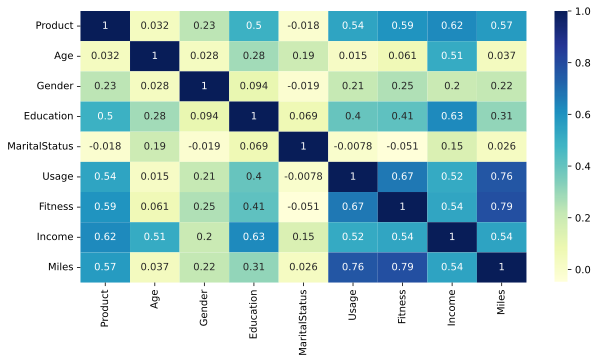

In [59]:
# Correlation Plot above as a Heatmap -

plt.figure(figsize=(10,5))
sns.heatmap(df_copy.corr(), cmap="YlGnBu", annot=True)
plt.show()